# Notebook 10: Proving languages nonregular using closure properties

<div class="alert alert-info"><p><b>Reread</b> Section 1.4, paying closer attention this time to pages 80-82.</p>
</div>

Today we look at non-regularity proofs that use closure properties. We've learned a number of closure properties: union, concatenation, Kleene star, reversal. But the two closure properties that are especially useful are intersection and string homomorphism.

## Intersection

Example 1.74 mentions an alternative proof strategy that involves the fact that regular languages are closed under intersection (footnote 3 of this chapter). This is an extremely common technique that lets you filter out strings that you don't want to deal with.

To show: Prove that $$C = \{w \in \{\mathtt{0}, \mathtt{1}\}^\ast \mid \text{$w$ contains an equal number of $\mathtt{0}$'s and $\mathtt{1}$'s}\}$$ is not regular.

Proof: Suppose that $C$ is regular. Because regular languages are closed under intersection, we can form the language $C \cap \texttt{0}^\ast \texttt{1}^\ast$, which must also be regular. But this language is none other than $B$, which we know is not regular. This is a contradiction.

As another example, let's prove that C (the programming language) is not regular. This is a big, messy language. The idea is to focus on one aspect of it, like curly braces. Suppose that C is regular. Then intersect C with the regular expression
$$\texttt{void main(void)}\texttt{\{}^\ast\texttt{\}}^\ast$$
The only valid C programs that match this are of the form
$$\texttt{void main(void)}\texttt{\{}^n\texttt{\}}^n$$
for $n \geq 1$. So now our job is to show that this simpler language (call it $C'$) is not regular. This is much easier -- but the $\texttt{void main(void)}$ is a nuisance. The proof goes like this:

The pumping lemma for regular languages says that there is a $p \geq 1$ such that any $s$ where $|s| \geq p$ can be written as $s = xyz$ where $|y| > 0$, $|xy| \leq p$ and $xy^iz \in C'$ for all $i$.
Let $$s = \texttt{void main(void)}\texttt{\{}^p\texttt{\}}^p$$
Note that because $|xy| \leq p$, $y$ cannot contain any $\texttt{\}}$ symbols.
- Case 1: $y$ consists of only $\{$ symbols. Then let $i=2$. But $xyyz$ must have more $\{$ symbols than $\}$ symbols, so it does not belong to $C'$, which is a contradiction.
- Case 2: $y$ contains something other than $\{$. Then let $i=0$. But $xz$ does not belong to $C'$ because -- because obviously, right?

You might be able to get away with that Case 2, but a much cleaner way of dealing with this is to use the next closure property.

## String homomorphisms

Another commonly used property is closure under string homomorphisms (Exercise 1.66). Remember that we defined a string homomorphism in HW1 to be a mapping from strings to strings with the properties
\begin{align*}
f(\varepsilon) &= \epsilon \\
f(uv) &= f(u) f(v).
\end{align*}
and we showed that we can think of a string homomorphism in terms of what it does to individual symbols. For example, if $\Sigma = \{\mathtt{a}, \mathtt{b}\}$ we can define a string homomorphism $f(\mathtt{a}) = \mathtt{a}, f(\mathtt{b}) = \varepsilon$. Extended to strings, what $f$ does is to delete all the $\mathtt{b}$'s from a string.

Regular languages are closed under string homomorphisms. That is, if $L$ is a regular language and $f$ is a string homomorphism, then
$$f(L) = \{f(w) \mid w \in L\}$$
is also a regular language.

Proof: Let $\alpha$ be a regular expression that describes $L$. Extend $f$ to regular expressions as follows:
\begin{align*}
f(\emptyset) &= \emptyset \\
f(\alpha \cup \beta) &= f(\alpha) \cup f(\beta) \\
f(\alpha^\ast) &= f(\alpha)^\ast
\end{align*}
Then $f(\alpha)$ is a regular expression that describes $f(L)$.

Another proof: Let $N$ be a NFA that recognizes $L$. We construct a new NFA $N'$ as follows. For each transition $q \xrightarrow{a} r$, let $k = |f(a)|$. If $k=0$, replace this transition with $q \xrightarrow{\varepsilon} r$. Otherwise, replace it with a chain of $k$ transitions:

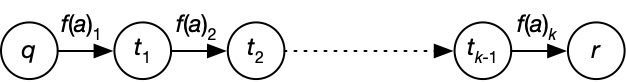

where $t_1, \ldots, t_{k-1}$ are fresh states that aren't used anywhere else. Then $N'$ recognizes $f(L)$.

This closure property lets you filter out symbols that you don't want to deal with. It also lets you conflate symbols that you don't need to distinguish. For our C-language example above, we could prove that $C'$ is not regular as follows:

Define a string homomorphism
\begin{align*}
f(\texttt{\{}) &= \texttt{0} \\
f(\texttt{\}}) &= \texttt{1} \\
f(a) &= \varepsilon \qquad a \not\in \{ \texttt{0}, \texttt{1} \}
\end{align*}

Then $f(C') = \{ \texttt{0}^n \texttt{1}^n \mid n \geq 1 \}$. But this is just $B$ (or close enough), which we know is not regular. This is a contradiction.